# Credits

See main readme for credits.

# Dependancies and supporting functions
Loading dependancies and supporting functions by running the code block below.

In [75]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# Do not worry about the code below for now, it is used for plotting later
def plot_decision_boundary(pred_func, X, y):
    #from https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    yy = yy.astype('float32')
    xx = xx.astype('float32')
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap=plt.cm.Spectral)

def onehot(t, num_classes):
    out = np.zeros((t.shape[0], num_classes))
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

# Purpose and goals
In this notebook you will implement a simple neural network in PyTorch.

> We assume that you are already familiar with backpropagation (if not please see [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) or [Michal Nielsen](http://neuralnetworksanddeeplearning.com/chap2.html)).

In this exercise we'll start right away by defining a logistic regression model.
We'll initially start with a simple 2D and two-class classification problem where the class decision boundary can be visualized.
Initially we show that logistic regression can only separate classes linearly.
Adding a nonlinear hidden layer to the algorithm permits nonlinear class separation.
If time permits we'll continue on to implement a fully connected neural network to classify the MNIST dataset consisting of images of hand written digits.

# Problem 
We'll initally demonstrate the that Multi-layer Perceptrons (MLPs) can classify nonlinear problems, whereas simple logistic regression cannot. For ease of visualization and computationl speed we initially experiment on the simple 2D half-moon dataset.

(300, 2) (300,)


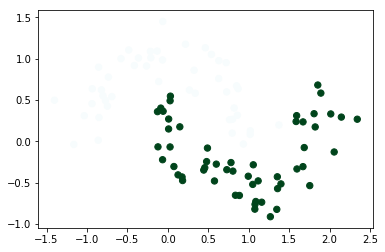

In [77]:
# Generate a dataset and plot it
np.random.seed(0)
num_samples = 300

X, y = sklearn.datasets.make_moons(num_samples, noise=0.20)

# define train, validation, and test sets
X_tr = X[:100].astype('float32')
X_val = X[100:200].astype('float32')
X_te = X[200:].astype('float32')

# and labels
y_tr = y[:100].astype('int32')
y_val = y[100:200].astype('int32')
y_te = y[200:].astype('int32')

plt.scatter(X_tr[:,0], X_tr[:,1], s=40, c=y_tr, cmap=plt.cm.BuGn)

print(X.shape, y.shape)

num_features = X_tr.shape[-1]
num_output = 2

# From Logistic Regression to "Deep Learning"
The code implements logistic regression. In section [__Assignments Half Moon__](#Assignments-Half-Moon) you are asked to modify the code into a neural network.

The building blocks of PyTorch are Tensors, Variables and Operations, with these we can form dynamic computational graphs that form neural networks.

$$y = \mathrm{nonlinearity}(xW + b)$$

where $x$ is the input tensor, $y$ is the output tensor, and $W, b$ are the weights (variable tensors). The weights are initialized with an initializer of our choice.

- $x$ has shape `[batch_size, num_features]`,
- $W$ has shape `[num_features, num_units]`,
- $b$ has `[num_units]`, and
- $y$ has then `[batch_size, num_units]`

## PyTorch 101

In this first exercise we will use basic PyTorch functions so that you can learn how to build it from scratch. This will help you later if you want to build your own custom operations.

In [78]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F

[`Parameters`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Parameter) are [`Variable`](http://pytorch.org/docs/0.1.12/autograd.html#torch.autograd.Variable) subclasses, that have a very special property when used with [`Module`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module)'s - when they’re assigned as `Module` attributes they are automatically added to the list of its parameters, and will appear e.g. in [`.parameters()`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module.parameters) iterator. Assigning a Variable doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as `Parameter`, these temporaries would get registered too.

In [206]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # Setting up variables, these variables are weights in your 
        # network that can be updated while running our graph.
        # Notice, to make a hidden layer, the weights need to have the 
        # following dimensionality:
        #   W[number_of_units_going_out, number_of_units_going_in]
        #   b[number_of_units_going_out]
        # in the example below we have 2 input units (num_features) and 2 output units (num_output)
        # so our weights become W[2, 2], b[2]
        # if we want to make a hidden layer with 100 units, we need to define the shape of the
        # first weight to W[100, 2], b[2] and the shape of the second weight to W[2, 100], b[2]
        self.W_1 = Parameter(torch.randn(num_output, num_features)) # change num_output to hidden units in 2nd layer
        self.b_1 = Parameter(torch.randn(num_output)) # change num_output to hidden units in second layer
        
        # second layer
        #self.W_2 = Parameter(torch.randn(num_output, 100))
        #self.b_2 = Parameter(torch.randn(num_output))

    def forward(self, x):
        # Setting up ops, these ops will define edges along our computational graph
        # The below ops will compute a logistic regression, 
        # but can be modified to compute a neural network
        x = F.linear(x, self.W_1, self.b_1) # remember to wrap your nonlinearity F.tanh(...)
        #x = F.linear(x, self.W_2, self.b_2)
        x = F.relu(x) # MO: added new layer
        #x = F.torch.tanh(x) #MO: asked torch.tanh instead tanh
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.torch.tanh(x)
        #x = F.tanh(x)
        #x = F.tanh(x)
        #x = F.tanh(x)
        x = F.tanh(x)
        x = F.tanh(x)
        x = F.tanh(x)
        return F.softmax(x, dim=1) # softmax to be performed on the second dimension


net = Net()

Knowing how to print your tensors is useful

In [207]:
# list all parameters in your network
print("NAMED PARAMETERS")
print(list(net.named_parameters()))
print()
# the .parameters() method simply gives the Tensors in the list
print("PARAMETERS")
print(list(net.parameters()))
print()

# list individual parameters by name
print('WEIGHTS')
print(net.W_1)
print(net.W_1.size())
print('\nBIAS')
print(net.b_1)
print(net.b_1.size())

NAMED PARAMETERS
[('W_1', Parameter containing:
tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]], requires_grad=True)), ('b_1', Parameter containing:
tensor([-0.0301, -0.9202], requires_grad=True))]

PARAMETERS
[Parameter containing:
tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]], requires_grad=True), Parameter containing:
tensor([-0.0301, -0.9202], requires_grad=True)]

WEIGHTS
Parameter containing:
tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]], requires_grad=True)
torch.Size([2, 2])

BIAS
Parameter containing:
tensor([-0.0301, -0.9202], requires_grad=True)
torch.Size([2])


# Exploring Parameter

Ok, let's investigate what a Parameter/Variable is

In [208]:
param = net.W_1
print("## this is the tensor")
print(param.data)
print("\n## this is the tensor's gradient")
print(param.grad)
# notice, the gradient is undefined because we have not yet run a backward pass

print("\n## is it a leaf in the graph?")
print(param.is_leaf)

## this is the tensor
tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]])

## this is the tensor's gradient
None

## is it a leaf in the graph?
True


## Excluding subgraphs from backward propagation

`Variable`s have two properties which allow you to define if a graph is going to be used for training or inference, `requires_grad` and `volatile`.
During training we might not want to compute the gradients for all layers, e.g. if we have a pretrained model or embeddings that we do not want to change the values of.
To compute gradients we need to store activations and compute the backward pass for the given layer.
Setting `requires_grad = False` will allow you to circumvent these properties.
If any paramater in an operation / layer requires gradient then the entire output of the operation will also require gradient.

The `volatile` property is mostly used when you want to run inference with your model, and if it is set to `True` the entire graph will not require gradient. This means that you expect to never call `.backward()` on the network.

See http://pytorch.org/docs/master/notes/autograd.html for an in-depth explanation.

# Test network

To use our network we can simply call our graph, and it will dynamically be created. Here is an example of running the network's forward pass.

In [209]:
X = Variable(torch.randn(5, num_features))
# the net.__call__ runs some pre-defined functions
# both before and after running net.forward()
# see http://pytorch.org/docs/master/_modules/torch/nn/modules/module.html
print(net(X))

tensor([[0.5000, 0.5000],
        [0.6552, 0.3448],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.3488, 0.6512]], grad_fn=<SoftmaxBackward>)


/home/muha/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Parameters is a special case of Variable 

In [210]:
# let's take a look at the gradients
for p in net.parameters():
    print(p.data)
    print(p.grad)

tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]])
None
tensor([-0.0301, -0.9202])
None


In [211]:
X = Variable(torch.randn(7, num_features))
out = net(X)
# we need to give a tensor of gradients to .backward,
# we give a dummy tensor
# for details on .backward(), see http://pytorch.org/docs/master/autograd.html#torch.autograd.backward
out.backward(torch.randn(7, num_output))

/home/muha/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [212]:
for p in net.parameters():
    print(p.data)
    print(p.grad)

tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]])
tensor([[ 0.0355, -0.0047],
        [ 0.0041,  0.0004]])
tensor([-0.0301, -0.9202])
tensor([ 0.0368, -0.0025])


In [213]:
# ok, let's try and zero the accumulated gradients
net.zero_grad()
for p in net.parameters():
    print(p.data)
    print(p.grad)

tensor([[ 0.7748,  2.0334],
        [-1.9036,  0.7325]])
tensor([[0., 0.],
        [0., 0.]])
tensor([-0.0301, -0.9202])
tensor([0., 0.])


# Loss function

Let's define a custom loss function to compute how good our graph is doing.

In [214]:
def cross_entropy(ys, ts):
    # computing cross entropy per sample
    cross_entropy = -torch.sum(ts * torch.log(ys), dim=1, keepdim=False)
    # averaging over samples
    return torch.mean(cross_entropy)

To train our neural network we need to update the parameters in direction of the negative gradient w.r.t the cost function we defined earlier.
We can use [`torch.optim`](http://pytorch.org/docs/master/optim.html) to get the gradients with some update rule for all parameters in the network.

Heres a small animation of gradient descent: http://imgur.com/a/Hqolp, which also illustrates which challenges optimizers might face, e.g. saddle points.

In [215]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

Next, we make the prediction functions, such that we can get an accuracy measure over a batch

In [216]:
def accuracy(ys, ts):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = torch.eq(torch.max(ys, 1)[1], torch.max(ts, 1)[1])
    # averaging the one-hot encoded vector
    return torch.mean(correct_prediction.float())

The next step is to utilize our `optimizer` repeatedly in order to optimize our weights `W_1` and `b_1` to make the best possible linear seperation of the half moon dataset.

/home/muha/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0, Train Cost: 0.620	Val Cost: 0.607	 Val acc: 0.520
Epoch 100, Train Cost: 0.620	Val Cost: 0.607	 Val acc: 0.520
Epoch 200, Train Cost: 0.620	Val Cost: 0.607	 Val acc: 0.520
Epoch 300, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520
Epoch 400, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520
Epoch 500, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520
Epoch 600, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520
Epoch 700, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520
Epoch 800, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520
Epoch 900, Train Cost: 0.619	Val Cost: 0.607	 Val acc: 0.520

Test Cost: 0.592	Test Accuracy: 0.520


Text(0,0.5,'Loss')

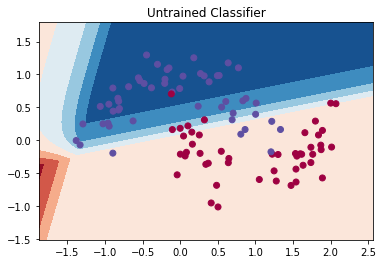

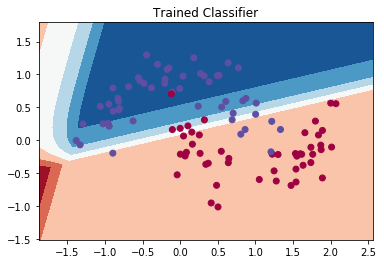

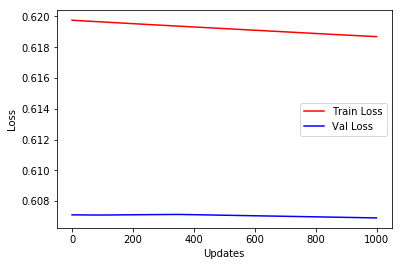

In [222]:
# number of training passses
num_epochs = 1000
# store loss and accuracy for information
train_losses, val_losses, val_accs = [], [], []

def pred(X):
    """ Compute graph's prediction and return numpy array
    
    Parameters
    ----------
    X : numpy.ndarray
    
    Returns
    -------
    numpy.ndarray
    """
    X = Variable(torch.from_numpy(X))
    y = net(X)
    return y.data.numpy()

# plot boundary on testset before training session
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Untrained Classifier")

# training loop
for e in range(num_epochs):
    # get training input and expected output as torch Variables and make sure type is correct
    tr_input = Variable(torch.from_numpy(X_tr))
    tr_targets = Variable(torch.from_numpy(onehot(y_tr, num_output))).float()
    
    # zeroize accumulated gradients in parameters
    optimizer.zero_grad()
    # predict by running forward pass
    tr_output = net(tr_input)
    # compute cross entropy loss
    tr_loss = cross_entropy(tr_output, tr_targets)
    # compute gradients given loss
    tr_loss.backward()
    # update the parameters given the computed gradients
    optimizer.step()
    
    # store training loss
    train_losses.append(tr_loss.data.numpy())
    
    # get validation input and expected output as torch Variables and make sure type is correct
    val_input = Variable(torch.from_numpy(X_val))
    val_targets = Variable(torch.from_numpy(onehot(y_val, num_output))).float()
    
    # predict with validation input
    val_output = net(val_input)
    # compute loss and accuracy
    val_loss = cross_entropy(val_output, val_targets)
    val_acc = accuracy(val_output, val_targets)
    
    # store loss and accuracy
    val_losses.append(val_loss.data.numpy())
    val_accs.append(val_acc.data.numpy())
    
    if e % 100 == 0:
        print("Epoch %i, "
              "Train Cost: %0.3f"
              "\tVal Cost: %0.3f"
              "\t Val acc: %0.3f" % (e, 
                                     train_losses[-1],
                                     val_losses[-1],
                                     val_accs[-1]))

# get test input and expected output
te_input = Variable(torch.from_numpy(X_te))
te_targets = Variable(torch.from_numpy(onehot(y_te, num_output))).float()
# predict on testset
te_output = net(te_input)
# compute loss and accuracy
te_loss = cross_entropy(te_output, te_targets)
te_acc = accuracy(te_output, te_targets)
print("\nTest Cost: %0.3f\tTest Accuracy: %0.3f" % (te_loss.data.numpy(), te_acc.data.numpy()))

# plot boundary on testset after training session
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Trained Classifier")


epoch = np.arange(len(train_losses))
plt.figure()
plt.plot(epoch, train_losses, 'r', epoch, val_losses, 'b')
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Updates')
plt.ylabel('Loss')

# Assignments Half Moon

1. A linear logistic classifier is only able to create a linear decision boundary. Change the Logistic classifier into a (nonlinear) Neural network by inserting a dense hidden layer between the input and output layers of the model
 
2. Experiment with multiple hidden layers or more / less hidden units. What happens to the decision boundary?
 
3. Overfitting: When increasing the number of hidden layers / units the neural network will fit the training data better by creating a highly nonlinear decision boundary. If the model is to complex it will often generalize poorly to new data (validation and test set). Can you observe this from the training and validation errors? 
 
4. We used the vanilla stocastic gradient descent algorithm for parameter updates. This is usually slow to converge and more sophisticated pseudo-second-order methods usually works better. Try changing the optimizer to [adam or momentum](http://pytorch.org/docs/master/optim.html#torch.optim.Adam)

When you're done, continue to the [next part of this lab](http://0.0.0.0:8888/notebooks/intermediate/1.2-FFN.ipynb).